In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import glob
import numpy as np

In [2]:
path = './dataFolders/Output/Step6_FloralTypeConsolidatedData_AndFitParameters/'
files = glob.glob(path +  '*_FittedParameters.csv')

outpath_fig = './dataFolders/Output/Figures/LinearRegression_toFindFitParameters/'

In [6]:
files

['./dataFolders/Output/Step6_FloralTypeConsolidatedData_AndFitParameters\\c-10_FittedParameters.csv',
 './dataFolders/Output/Step6_FloralTypeConsolidatedData_AndFitParameters\\c-1_FittedParameters.csv',
 './dataFolders/Output/Step6_FloralTypeConsolidatedData_AndFitParameters\\c-2_FittedParameters.csv',
 './dataFolders/Output/Step6_FloralTypeConsolidatedData_AndFitParameters\\c-3_FittedParameters.csv']

In [10]:
shape = ['c-1', 'c-2', 'c-3', 'c-10']
ctr= 0
for flowertype in shape:
    file = [file for file in files if flowertype + '_' in file]
    flowername[ctr] = pd.read_csv(file[0], engine = 'python')
    ctr+=1

In [12]:
flowername[0]

,Unnamed: 0,slope,std_err,p_value,r_value,y_intercept,y_intercept_std,average_firstTrial,alpha,tau,covariance
0,one-half,0.000594,0.023032,0.979483,0.002674,3.331895,2.342270,12.863571,9.531677,0.002454,0.216145
1,last fourth,-0.114475,0.094562,0.241712,-0.274386,3.167000,2.715554,12.863571,9.696571,0.003630,0.071204
2,last eight,-0.068455,0.245934,0.787806,-0.097937,2.738000,2.443608,12.863571,10.125571,0.007925,0.053980


In [13]:
df = []
tau_table = []
ctr = 0
length = 0
for length in range(3):
    df = pd.DataFrame({'name': ['c-1', 'c-2', 'c-3', 'c-10'],
                       'mean_y0': [flowername[0].y_intercept[length], flowername[1].y_intercept[length], 
                             flowername[2].y_intercept[length], flowername[3].y_intercept[length]],
                       'std_y0': [flowername[0].y_intercept_std[length], flowername[1].y_intercept_std[length], 
                             flowername[2].y_intercept_std[length], flowername[3].y_intercept_std[length]],
                       'tau': [flowername[0].tau[length], flowername[1].tau[length], 
                             flowername[2].tau[length], flowername[3].tau[length]],
                         'covariance':[flowername[0].covariance[length], flowername[1].covariance[length],
                                    flowername[2].covariance[length], flowername[3].covariance[length]]
                        })
    std_dev = np.sqrt(df.covariance.values)
    df['std_dev'] = std_dev
    tau_table.append(df)
    ctr+=1

In [14]:
tau_table

[   name   mean_y0    std_y0       tau   covariance    std_dev
 0   c-1  3.331895  2.342270  0.002454     0.216145   0.464914
 1   c-2  3.449524  2.787793  0.008812     0.058466   0.241798
 2   c-3  3.729194  2.256191  0.071256     2.514752   1.585797
 3  c-10  4.948667  4.297623  0.509870  2532.747152  50.326406,
    name   mean_y0    std_y0       tau   covariance    std_dev
 0   c-1  3.167000  2.715554  0.003630     0.071204   0.266841
 1   c-2  2.850303  1.172435  0.011634     0.064479   0.253928
 2   c-3  4.402308  2.249445  0.051872     2.406508   1.551292
 3  c-10  5.126923  4.539718  0.486288  2452.940447  49.527169,
    name   mean_y0    std_y0       tau   covariance    std_dev
 0   c-1  2.738000  2.443608  0.007925     0.053980   0.232336
 1   c-2  2.782222  1.047136  0.012033     0.065684   0.256288
 2   c-3  4.544000  2.741793  0.048383     2.424553   1.557098
 3  c-10  4.940000  4.964681  0.511448  2523.742381  50.236863]

In [15]:
import pickle

with open('./dataFolders/Output/Step6_FloralTypeConsolidatedData_AndFitParameters/AllFitVariables', 'wb') as fp:
    pickle.dump(tau_table, fp)

In [16]:
tau_table[0]

,name,mean_y0,std_y0,tau,covariance,std_dev
0,c-1,3.331895,2.342270,0.002454,0.216145,0.464914
1,c-2,3.449524,2.787793,0.008812,0.058466,0.241798
2,c-3,3.729194,2.256191,0.071256,2.514752,1.585797
3,c-10,4.948667,4.297623,0.509870,2532.747152,50.326406


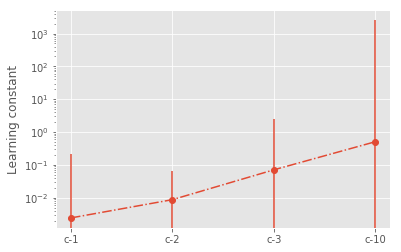

In [23]:
plt.errorbar(tau_table[0].name, tau_table[0].tau, yerr = tau_table[0].covariance, fmt = 'o-.')
plt.yscale('log')
plt.ylabel('Learning constant')
ymin, ymax = plt.ylim()
plt.savefig(outpath_fig + 'tauWithSE.svg')

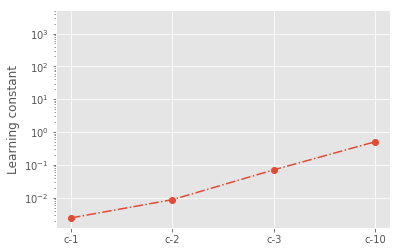

In [24]:
plt.plot(tau_table[0].name, tau_table[0].tau, 'o-.')
plt.yscale('log')
plt.ylabel('Learning constant')
plt.ylim(ymin, ymax)
plt.savefig(outpath_fig + 'tau.svg')

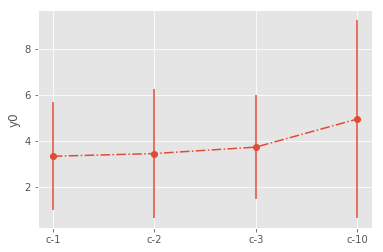

In [17]:
plt.errorbar(tau_table[0].name, tau_table[0].mean_y0, yerr = tau_table[0].std_y0, fmt = 'o-.')
plt.ylabel('y0')
plt.savefig(outpath_fig + 'y_intercept.svg')